In [1]:
#%matplotlib qt5
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def func1(x):
    return (6*x-2)**2*np.sin(12*x-4)

In [3]:
n_grid = 1000
n_samples = 3
x_grid = np.linspace(0,1,n_grid)
y_grid = func1(x_grid)
x_samples = np.linspace(0,1,n_samples)
y_samples = func1(x_samples)

/Users/heytitle/projects/neural-network-project/lib/python3.5/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  
/Users/heytitle/projects/neural-network-project/lib/python3.5/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/heytitle/projects/neural-network-project/lib/python3.5/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


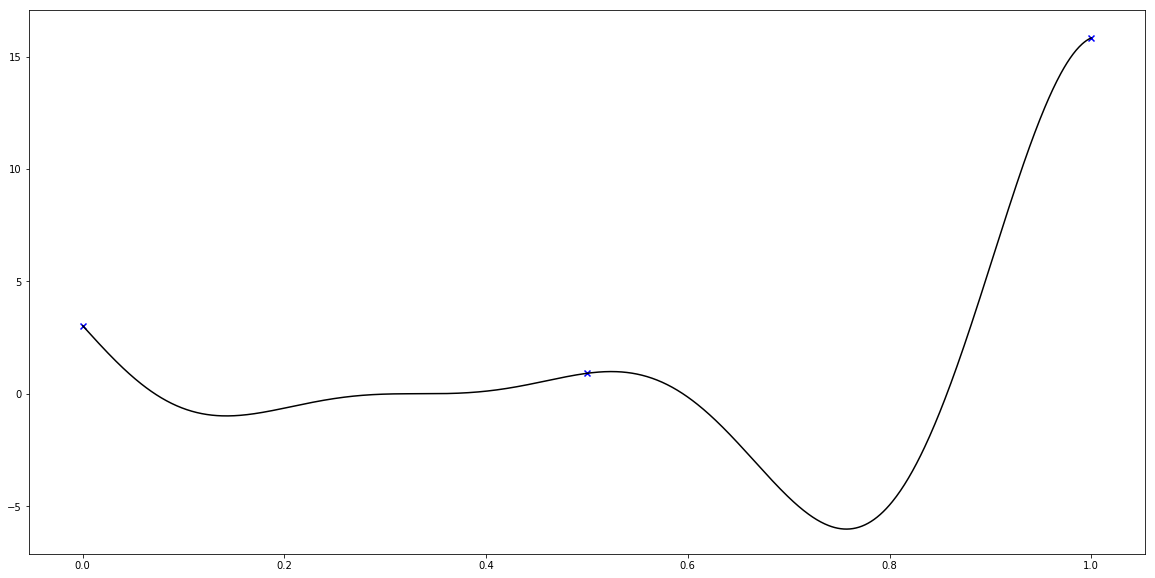

In [4]:
plt.figure(figsize=(20,10))
plt.hold(True)
plt.plot(x_grid,y_grid,color='k')
plt.scatter(x_samples,y_samples,marker='x',color="b")
plt.show()

In [6]:
# Define Model
x = tf.placeholder(shape=[None, 1],dtype=tf.float32)
y = tf.placeholder(shape=[None, 1],dtype=tf.float32)

W_1 = tf.Variable(tf.truncated_normal(shape=[1, 127],stddev=0.5))
b_1 = tf.Variable(tf.truncated_normal([127],stddev=0.5))
W_2 = tf.Variable(tf.truncated_normal([127, 127],stddev=0.5))
b_2 = tf.Variable(tf.truncated_normal([127],stddev=0.5))
W_out = tf.Variable(tf.truncated_normal([127, 1],stddev=0.5))
b_out = tf.Variable(tf.truncated_normal([1],stddev=0.5))

y_predict = tf.matmul(tf.sigmoid(tf.matmul(tf.sigmoid(tf.matmul(x, W_1)+b_1), W_2) + b_2),W_out)+b_out

In [7]:
# Cost Function
error = tf.reduce_mean(tf.square(y_predict-y))

# Optimizer
train_step = tf.train.AdamOptimizer().minimize(error)

In [8]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

err = sess.run([error],feed_dict={x:x_samples.reshape(n_samples,1),y:y_samples.reshape(n_samples,1)})
print(err)

for i in range(1500):
    sess.run(train_step,feed_dict={x:x_samples.reshape(n_samples,1),y:y_samples.reshape(n_samples,1)})
        
err = sess.run([error],feed_dict={x:x_samples.reshape(n_samples,1),y:y_samples.reshape(n_samples,1)})
print(err)

[183.27191]
[4.9064602e-05]


In [9]:
y_p = sess.run(y_predict, feed_dict={x:x_grid.reshape(n_grid,1)})

In [10]:
y_p = np.array(y_p).reshape(n_grid)
u = np.reshape(np.array(np.min(np.abs(np.repeat(np.matrix(x_samples).T,n_grid,axis=1)-x_grid), axis=0)),-1)

/Users/heytitle/projects/neural-network-project/lib/python3.5/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  
/Users/heytitle/projects/neural-network-project/lib/python3.5/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/heytitle/projects/neural-network-project/lib/python3.5/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


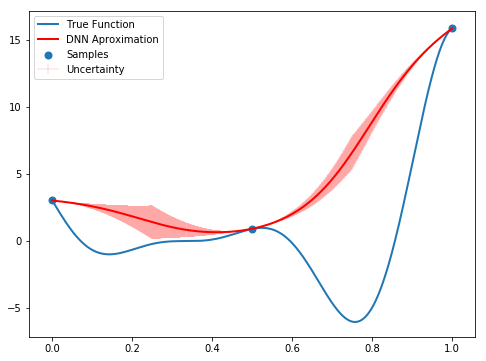

In [32]:
plt.figure(figsize=(8,6))
plt.hold(True)
plt.plot(x_grid,y_grid,label='True Function',linewidth=2)
plt.errorbar(x_grid, y_p, 20*u**2, c='r', alpha=0.1, animated=True, label="Uncertainty")
plt.plot(x_grid,y_p, label="DNN Aproximation",linewidth=2, c='r')


# #plt.plot(x_grid, 20*u**2, label="Uncertainty")
# plt.plot(x_grid, y_p-20*u**2, label="Uncertainty")
# plt.plot(x_grid, y_p+20*u**2, label="Uncertainty")
plt.scatter(x_samples,y_samples,linewidth=2,label="Samples")
#plt.title("1D Regression")
plt.legend()
plt.show()

In [12]:
(y_p-u).shape

(1000,)